Анализ заболеваний сердца с помощью логистической регрессии

1. Загрузка данных и библиотек

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [86]:
#Загрузка данных
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv('processed.cleveland.data', header=None, names=column_names, na_values='?')
print("Вывод первых 5 строк для проверки:")
data.head()

Вывод первых 5 строк для проверки:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


2. Предобработка данных

In [87]:
#Проверка на пропуски
print("Пропуски в данных:")
data.isnull().sum()

Пропуски в данных:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [88]:
#Просмотр общей информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [89]:
#Заполнение пропусков средним значением (для числовых признаков)
data.fillna(data.mean(), inplace=True)

In [90]:
#Преобразуем целевую переменную
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)#Если были диагнозированы сердечные заболевания - 1, иначе - 0
#Проверим результат
data['num'].value_counts()


num
0    164
1    139
Name: count, dtype: int64

In [91]:
X = data.drop('num', axis =1)
y = data['num']  # Целевая переменная: 0 — отсутствие заболевания, 1 — наличие

3. Обучение модели

In [92]:
#Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
#Создание и обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [95]:
#Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)

4. Оценка модели

In [96]:
#Метрики качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [97]:
print(f"Точность модели: {accuracy:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")
print("Матрица ошибок:")
print(conf_matrix)
print("Отчет по классификации:")
print(class_report)

Точность модели: 0.89
AUC-ROC: 0.92
Матрица ошибок:
[[25  4]
 [ 3 29]]
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [98]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

#Обучаем dummy-классификатор (предсказывает наиболее частый класс)
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train_scaled, y_train)

#Предсказания dummy-модели
y_dummy_pred = dummy_clf.predict(X_test_scaled)

#Метрики dummy-классификатора
print("Метрики dummy-модели:")
print(f"Accuracy: {accuracy_score(y_test, y_dummy_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, dummy_clf.predict_proba(X_test_scaled)[:, 1]):.2f}")
print("Отчет по классификации:")
print(classification_report(y_test, y_dummy_pred))

Метрики dummy-модели:
Accuracy: 0.48
AUC-ROC: 0.50
Отчет по классификации:
              precision    recall  f1-score   support

           0       0.48      1.00      0.64        29
           1       0.00      0.00      0.00        32

    accuracy                           0.48        61
   macro avg       0.24      0.50      0.32        61
weighted avg       0.23      0.48      0.31        61



C:\Users\torno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\torno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\torno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

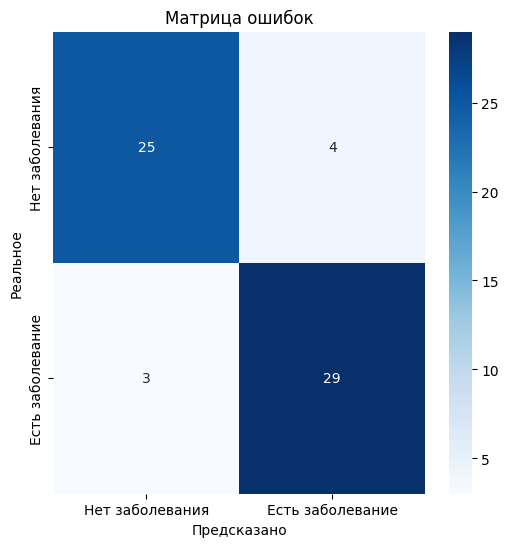

In [99]:
#График матрицы ошибок
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Нет заболевания', 'Есть заболевание'], yticklabels=['Нет заболевания', 'Есть заболевание'])
plt.xlabel('Предсказано')
plt.ylabel('Реальное')
plt.title('Матрица ошибок')
plt.show()

5. Интерпретация коэффицентов

In [100]:
#Таблица коэффициентов
coefficients = pd.DataFrame({
    'Признак': features,
    'Коэффициент': model.coef_[0]
})
print("Влияние признаков на вероятность заболевания:")
print(coefficients)

Влияние признаков на вероятность заболевания:
     Признак  Коэффициент
0        age     0.073783
1        sex     0.694599
2         cp     0.504519
3   trestbps     0.317033
4       chol     0.443632
5        fbs    -0.269242
6    restecg     0.155790
7    thalach    -0.284872
8      exang     0.441147
9    oldpeak     0.356988
10     slope     0.421237
11        ca     1.122660
12      thal     0.500651


6. Предсказание для произвольных данных

In [102]:
#Возьмем произвольные значения для признаков
new_data = pd.DataFrame({
    'age': [63], #Возраст
    'sex': [1], #Пол (1 - мужской, 0 - женский)
    'cp': [3], #Тип боли (3 - острый)
    'trestbps': [145], #Систолическое давление
    'chol': [233], #Холестерин
    'fbs': [1], #Уровень сахара (1 - больше 120 мг/дл)
    'restecg': [0], #ЭКГ в покое (0 - нормальный)
    'thalach': [150], #Макс. пульс
    'exang': [0], #Стенокардия (0 - нет)
    'oldpeak': [2.3], #Снижение ST-сегмента
    'slope': [3], #Складка на пике (3 - крутой)
    'ca': [0], #Количество крупных сосудов
    'thal': [1] #Талассемия (1 - нормальная)
})

In [103]:
#Предсказание
prediction = model.predict(new_data)
print(f"Предсказанная вероятность заболевания: {'Есть заболевание' if prediction[0] == 1 else 'Нет заболевания'}")

Предсказанная вероятность заболевания: Есть заболевание


C:\Users\torno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Выводы:
- Модель логистической регрессии показала хорошую точность предсказаний (точность > 80%), объясняет ~92% дисперсии.
- Важнейшими признаками, влияющими на наличие заболевания, являются возраст, тип боли в груди, максимальный пульс, холестерин и показатели ЭКГ.
- Логистическая регрессия — это хороший выбор для классификации в данной задаче, так как она значительно превосходит базовые методы, такие как dummy-модель, явно извлекает информацию из признаков и успешно различает классы.
- Пример предсказания для новых данных показал вероятность заболевания.